Goal: Goal: Train and test a Random Forest Regression model using features: Bednights, Region, HHSize, HHEmployed, HHTANF, and slotted along with group: FamilyID to be able to predict bednights. Evaluate and iterate model. Second attempt at modeling after Linear Regression.

In [3]:
##Load Modules for Roandom Forest Regression Analysis training and testing
import pandas as pd
from sklearn.model_selection import GroupKFold, cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import numpy as np

In [4]:
##Load data, already processed to show no duplicates and no NaN in Linear Model, won't be repeated here
##Forest Regressor handles one-hot encoding natively, won't repeat pd.get_dummies here.
## descriptive statistics handled previously in Linear Regression. .describe() not repeated here.
forest1 = pd.read_csv("C:/Users/morel/Downloads/Training Data 7-4-2025.csv")
print(forest1.head(5))

   FamilyID  ResidentID  Bednights  RegionCode  HHSize  HHEmployed  HHTANF  \
0       243         957        957           1       4           1       0   
1       243         958        957           1       4           1       0   
2       243         959        957           1       4           1       0   
3       243         960        957           1       4           1       0   
4       242         973        944           1       3           1       0   

   Slotted  SlottedCCM  SlottedPME  Destination  SingleMom  SingleDad  \
0        0           0           0            6          0          0   
1        0           0           0            6          0          0   
2        0           0           0            6          1          0   
3        0           0           0            6          0          0   
4        1           1           0            4          0          0   

   SingleParent  Disability  
0             0           0  
1             0           0  
2 

In [7]:
##Forest Regression: predict bednights. expand categorical column
forest_encoded = pd.get_dummies(forest1, columns=['RegionCode','Destination'], dtype=int)
x = forest_encoded.drop(columns=['Bednights','FamilyID','ResidentID','Destination_1']) 
y = forest_encoded['Bednights']                                       
groups = forest_encoded['FamilyID']
print(forest_encoded.head())

   FamilyID  ResidentID  Bednights  HHSize  HHEmployed  HHTANF  Slotted  \
0       243         957        957       4           1       0        0   
1       243         958        957       4           1       0        0   
2       243         959        957       4           1       0        0   
3       243         960        957       4           1       0        0   
4       242         973        944       3           1       0        1   

   SlottedCCM  SlottedPME  SingleMom  ...  Destination_2  Destination_3  \
0           0           0          0  ...              0              0   
1           0           0          0  ...              0              0   
2           0           0          1  ...              0              0   
3           0           0          0  ...              0              0   
4           1           0          0  ...              0              0   

   Destination_4  Destination_5  Destination_6  Destination_7  Destination_8  \
0              0  

HHSize: 0.1807
HHEmployed: 0.2949
HHTANF: 0.0704
Slotted: 0.0386
SlottedCCM: 0.0200
SlottedPME: 0.0051
SingleMom: 0.0041
SingleDad: 0.0024
SingleParent: 0.0027
Disability: 0.0000
RegionCode_1: 0.0215
RegionCode_2: 0.0141
RegionCode_3: 0.0226
RegionCode_4: 0.0194
RegionCode_5: 0.0000
Destination_2: 0.0005
Destination_3: 0.1457
Destination_4: 0.0476
Destination_5: 0.0069
Destination_6: 0.0509
Destination_7: 0.0019
Destination_8: 0.0072
Destination_9: 0.0152
Destination_10: 0.0000
Destination_11: 0.0277


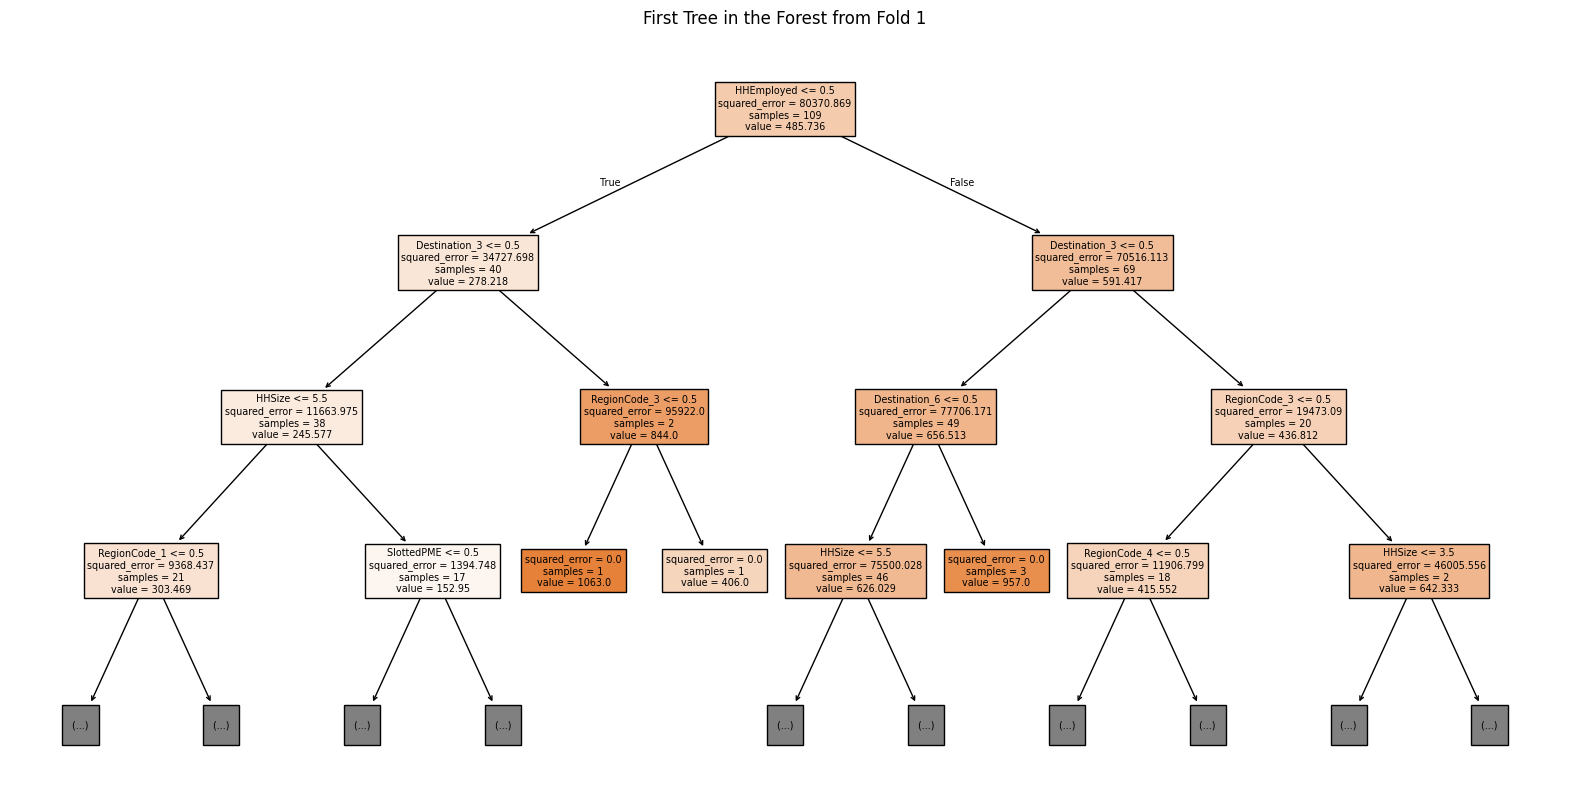

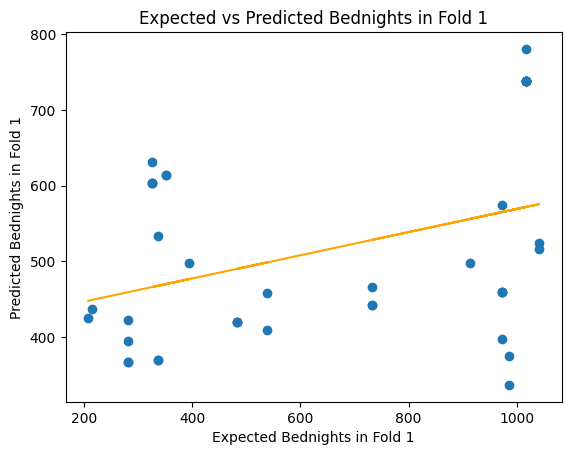

Fold 1 - MSE: 103552.0856, RMSE: 321.7951, R^2: -0.0413
HHSize: 0.2907
HHEmployed: 0.2551
HHTANF: 0.0180
Slotted: 0.0169
SlottedCCM: 0.0138
SlottedPME: 0.0112
SingleMom: 0.0042
SingleDad: 0.0022
SingleParent: 0.0042
Disability: 0.0000
RegionCode_1: 0.0202
RegionCode_2: 0.0166
RegionCode_3: 0.0059
RegionCode_4: 0.0320
RegionCode_5: 0.0000
Destination_2: 0.0006
Destination_3: 0.0816
Destination_4: 0.0468
Destination_5: 0.0388
Destination_6: 0.0535
Destination_7: 0.0042
Destination_8: 0.0220
Destination_9: 0.0210
Destination_10: 0.0311
Destination_11: 0.0093


<Figure size 640x480 with 0 Axes>

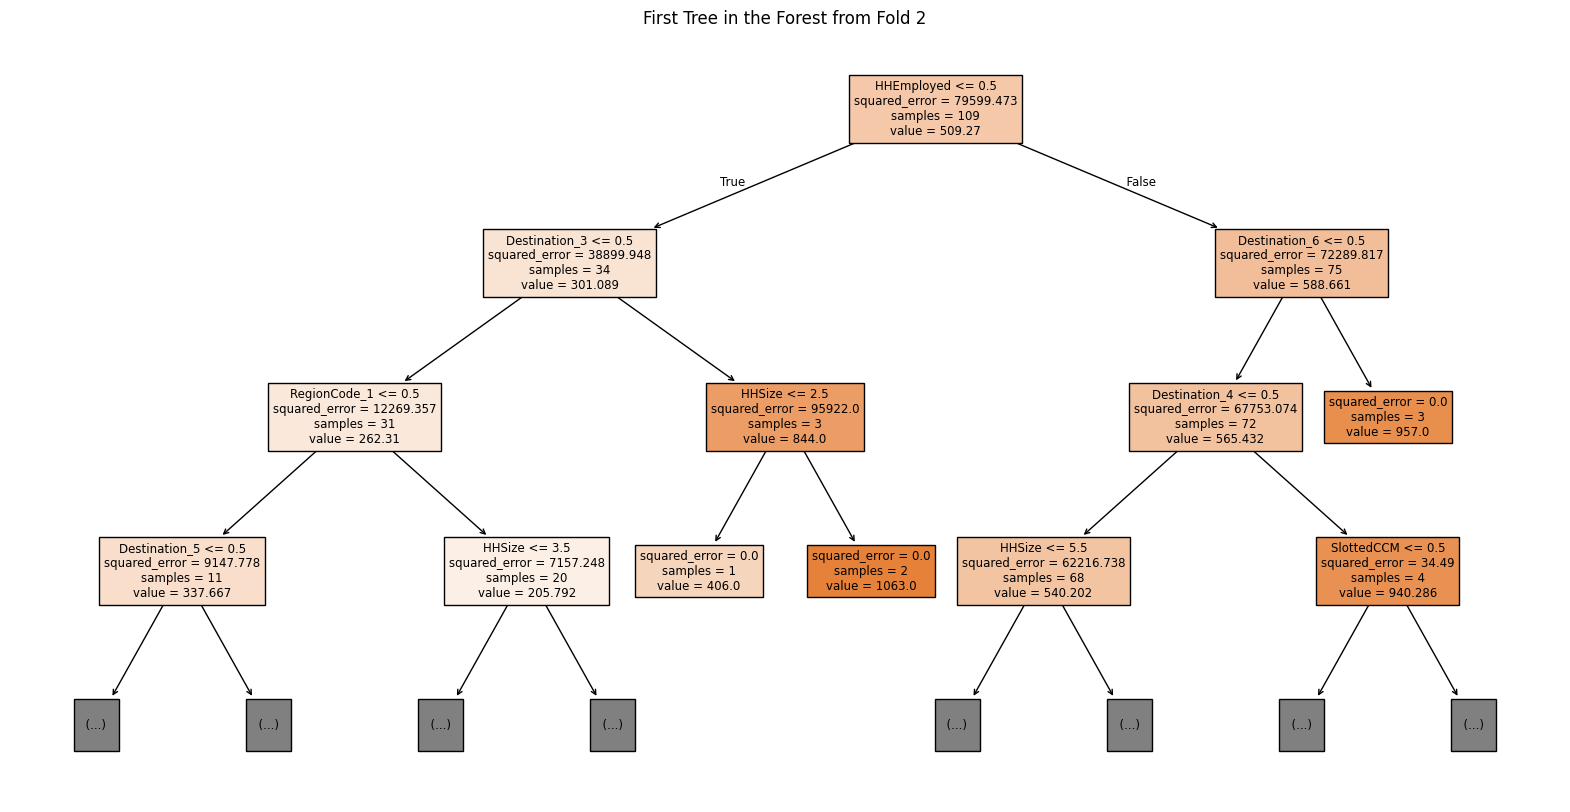

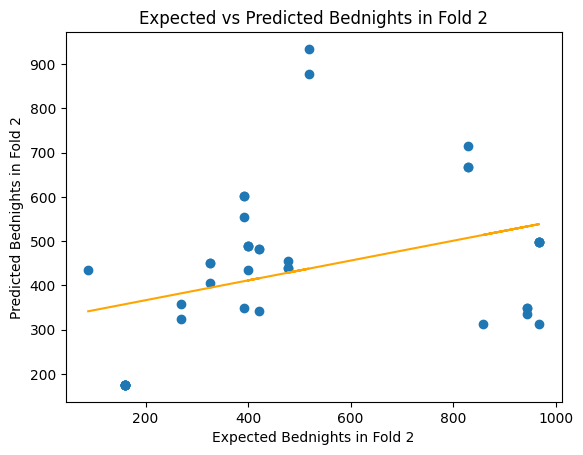

Fold 2 - MSE: 82507.1060, RMSE: 287.2405, R^2: 0.0135
HHSize: 0.2452
HHEmployed: 0.2119
HHTANF: 0.0501
Slotted: 0.0166
SlottedCCM: 0.0301
SlottedPME: 0.0222
SingleMom: 0.0112
SingleDad: 0.0086
SingleParent: 0.0061
Disability: 0.0004
RegionCode_1: 0.0322
RegionCode_2: 0.0152
RegionCode_3: 0.0170
RegionCode_4: 0.0172
RegionCode_5: 0.0000
Destination_2: 0.0022
Destination_3: 0.1011
Destination_4: 0.0365
Destination_5: 0.0243
Destination_6: 0.0463
Destination_7: 0.0048
Destination_8: 0.0428
Destination_9: 0.0116
Destination_10: 0.0268
Destination_11: 0.0197


<Figure size 640x480 with 0 Axes>

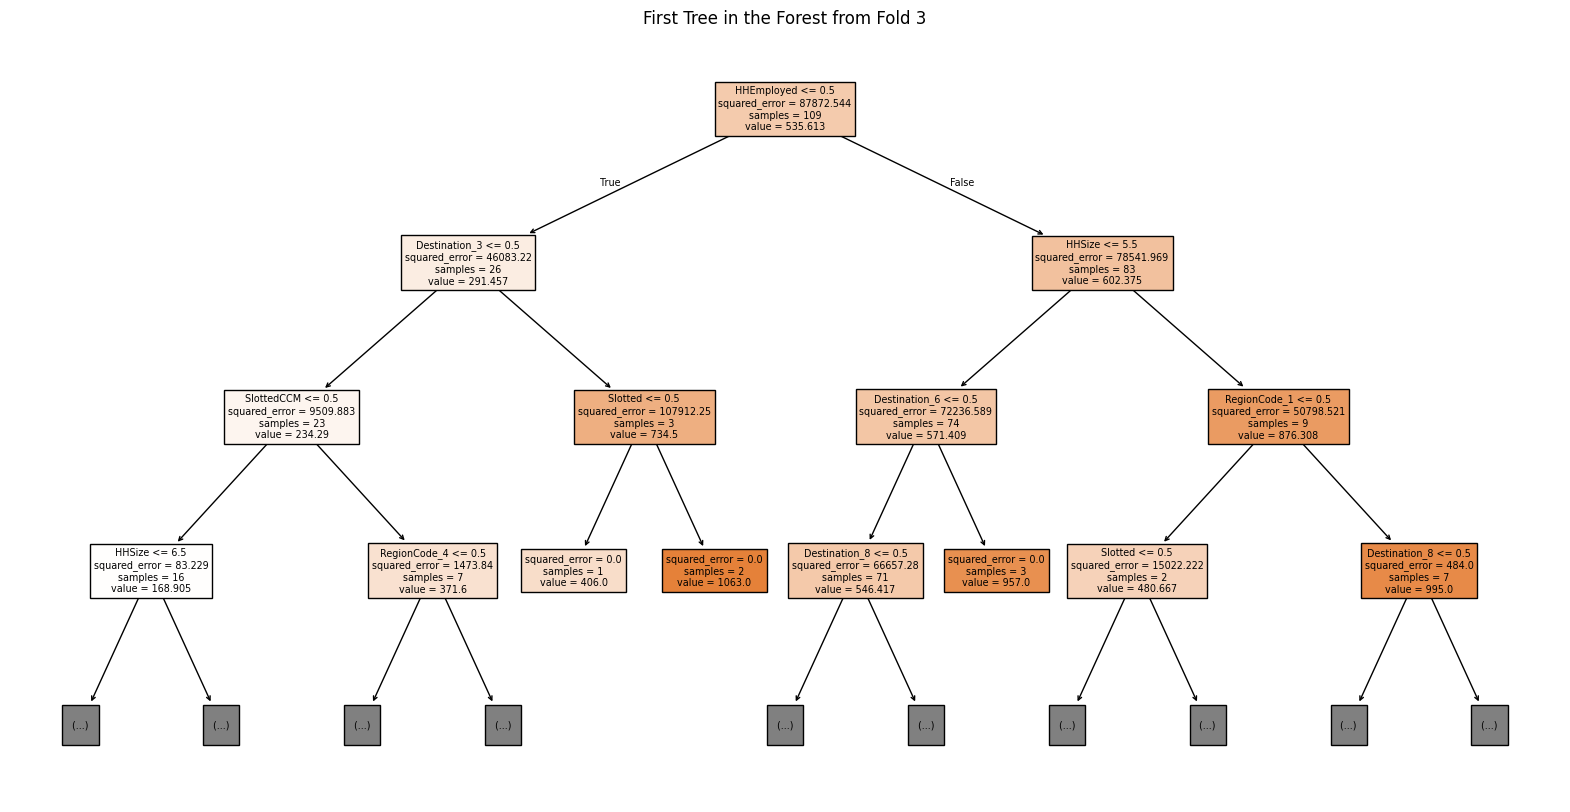

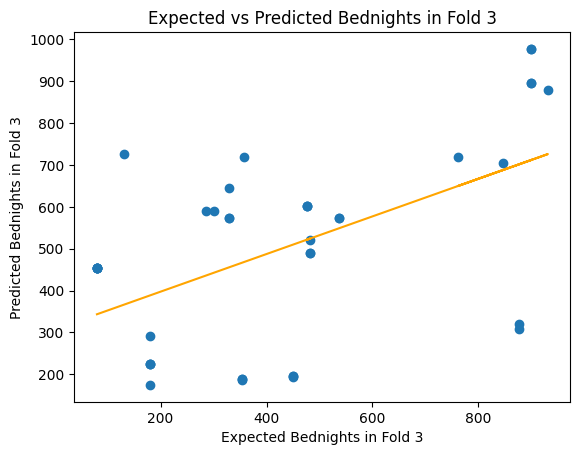

Fold 3 - MSE: 66731.8156, RMSE: 258.3250, R^2: 0.1120
HHSize: 0.2972
HHEmployed: 0.3599
HHTANF: 0.0127
Slotted: 0.0071
SlottedCCM: 0.0129
SlottedPME: 0.0056
SingleMom: 0.0068
SingleDad: 0.0050
SingleParent: 0.0061
Disability: 0.0000
RegionCode_1: 0.0137
RegionCode_2: 0.0228
RegionCode_3: 0.0033
RegionCode_4: 0.0374
RegionCode_5: 0.0000
Destination_2: 0.0006
Destination_3: 0.0745
Destination_4: 0.0248
Destination_5: 0.0049
Destination_6: 0.0496
Destination_7: 0.0000
Destination_8: 0.0025
Destination_9: 0.0141
Destination_10: 0.0160
Destination_11: 0.0225


<Figure size 640x480 with 0 Axes>

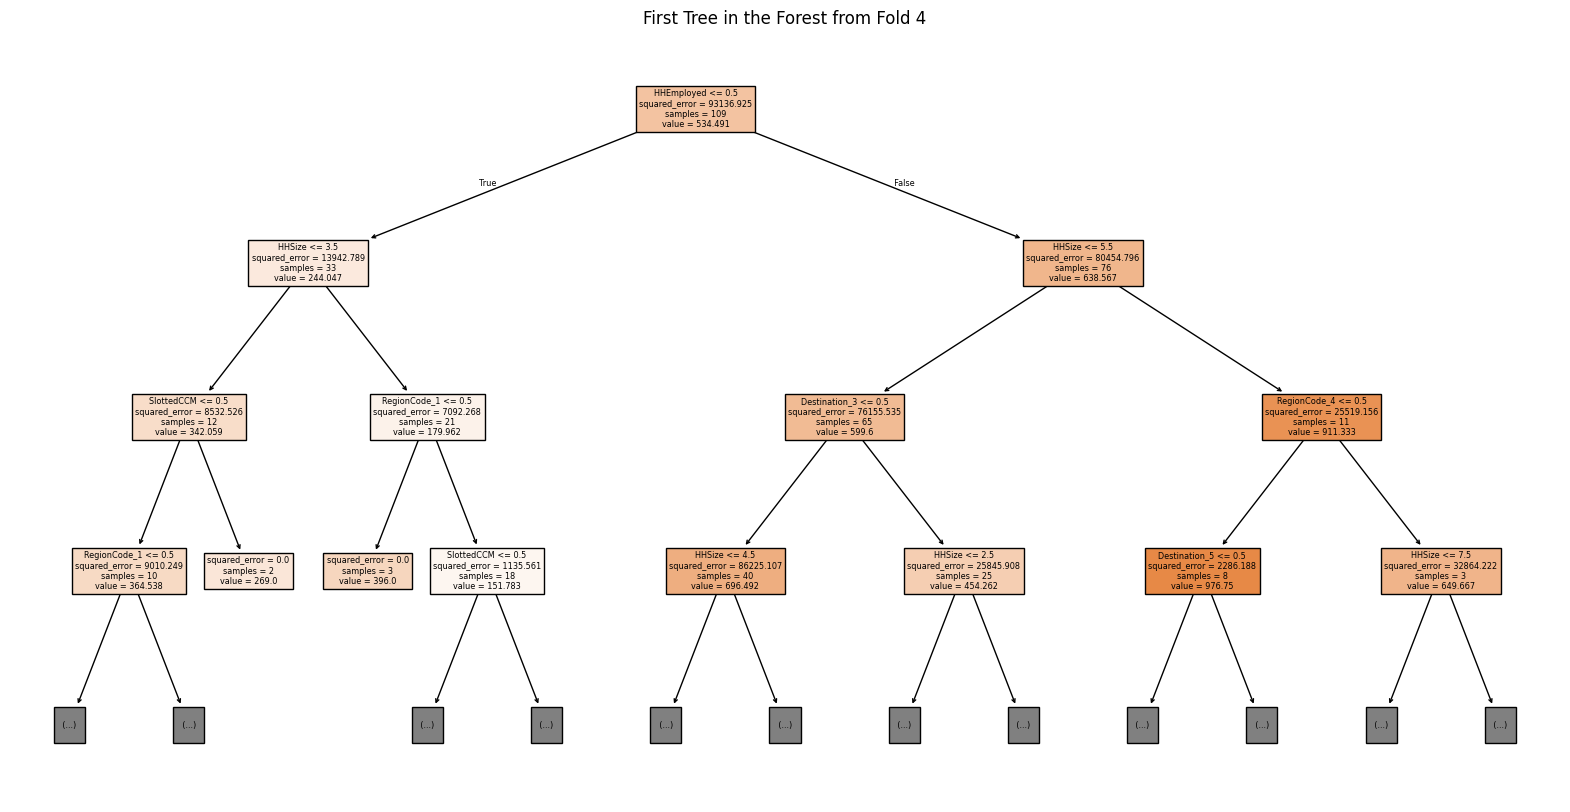

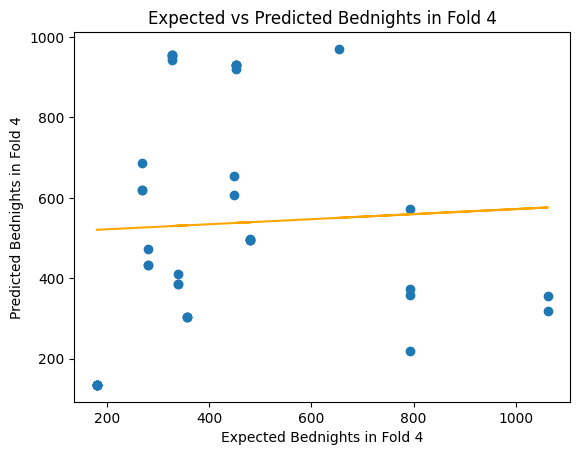

Fold 4 - MSE: 136244.7966, RMSE: 369.1135, R^2: -1.7799
HHSize: 0.3215
HHEmployed: 0.1923
HHTANF: 0.0451
Slotted: 0.0205
SlottedCCM: 0.0191
SlottedPME: 0.0213
SingleMom: 0.0097
SingleDad: 0.0083
SingleParent: 0.0043
Disability: 0.0007
RegionCode_1: 0.0286
RegionCode_2: 0.0201
RegionCode_3: 0.0145
RegionCode_4: 0.0366
RegionCode_5: 0.0000
Destination_2: 0.0003
Destination_3: 0.1319
Destination_4: 0.0037
Destination_5: 0.0310
Destination_6: 0.0000
Destination_7: 0.0053
Destination_8: 0.0181
Destination_9: 0.0064
Destination_10: 0.0346
Destination_11: 0.0261


<Figure size 640x480 with 0 Axes>

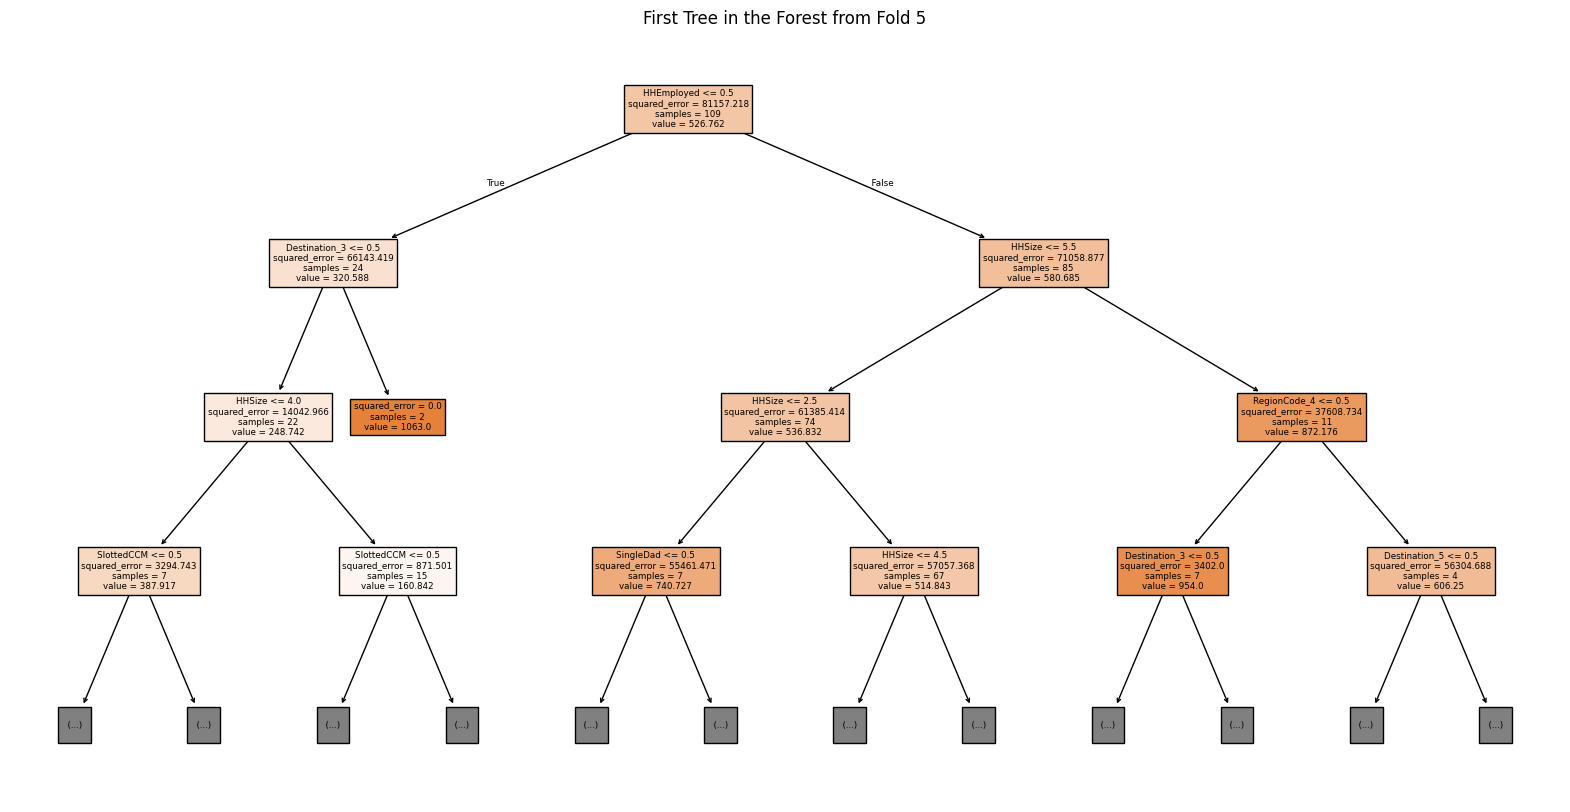

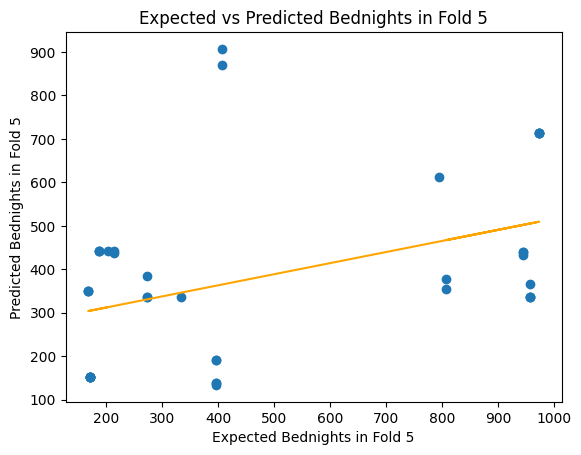

Fold 5 - MSE: 104942.2478, RMSE: 323.9479, R^2: 0.0401


<Figure size 640x480 with 0 Axes>

In [8]:
##Forest Regression: predict bednights. GKF - set up folds for cross validation and to handle autocorrelation
gkf = GroupKFold(n_splits=5)

##Loop through folds to split the data for testing and training, fitting model, show fitness, and evaluate
for fold, (train_idx, test_idx) in enumerate(gkf.split(x, y, groups)):
    x_train, x_test = x.iloc[train_idx], x.iloc[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

    ##train (pipeline handles transforming data and training the model at the same time and reproducibly, it's coming together in my head)
    ##get estimators and column names to show tree
    ##get importances of each feature to improve model
    model = RandomForestRegressor(random_state=42)
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    first_tree = model.estimators_[0]
    feature_names = x.columns
    importances = model.feature_importances_
    for name, importance in zip(
        feature_names, importances):
        print(f'{name}: {importance:.4f}')

    ##show tree
    plt.figure(figsize=(20, 10))
    plot_tree(first_tree,
             feature_names=feature_names,
             filled=True,
             rounded=False,
             max_depth=3)
    plt.title(f'First Tree in the Forest from Fold {fold+1}')
    plt.show()
    plt.clf()

    ##show fitness
    plt.scatter(y_test, y_pred)
    plt.xlabel(f'Expected Bednights in Fold {fold+1}')
    plt.ylabel(f'Predicted Bednights in Fold {fold+1}')
    plt.title(f'Expected vs Predicted Bednights in Fold {fold+1}')
    a, b = np.polyfit(y_test, y_pred, 1)
    plt.plot(y_test, a * y_test + b, color='orange')
    plt.show()
    plt.clf()

    ##Evaluate
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    print(f'Fold {fold+1} - MSE: {mse:.4f}, RMSE: {rmse:.4f}, R^2: {r2:.4f}')

Goal 2: Improve. Random Forest Regression has worse R^2 values than Linear Regression. Retrain using aggregate importances and subset of features to maximize cross-validated r2.

In [9]:
##Improve Forest Regression: predict bednights. initialize variables / lists
importances_all_folds = []

In [10]:
##Improve Forest Regression: predict bednights. Train multiple models to select features and collect importances
for fold, (train_idx, test_idx) in enumerate(gkf.split(x,y,groups)):
    x_train, y_train = x.iloc[train_idx], y.iloc[train_idx]

    model = RandomForestRegressor(random_state = 42)
    model.fit(x_train, y_train)

    importances_all_folds.append(model.feature_importances_)
    
importances_all_folds = np.array(importances_all_folds)

In [11]:
##Improve Forest Regression: predict bednights. aggregate and df importances to choose most effective features for the model most easily, dynamically
mean_importances = np.mean(importances_all_folds, axis=0)
feature_importances = pd.DataFrame({
    'feature': x.columns,
    'importance': mean_importances}).sort_values(by='importance',ascending=False)
print(feature_importances)

           feature  importance
0           HHSize    0.267079
1       HHEmployed    0.262832
16   Destination_3    0.106954
19   Destination_6    0.040049
2           HHTANF    0.039282
17   Destination_4    0.031864
13    RegionCode_4    0.028502
10    RegionCode_1    0.023239
23  Destination_10    0.021688
18   Destination_5    0.021177
24  Destination_11    0.021070
3          Slotted    0.019936
4       SlottedCCM    0.019173
21   Destination_8    0.018519
11    RegionCode_2    0.017767
22   Destination_9    0.013682
5       SlottedPME    0.013087
12    RegionCode_3    0.012650
6        SingleMom    0.007202
7        SingleDad    0.005296
8     SingleParent    0.004661
20   Destination_7    0.003230
15   Destination_2    0.000819
9       Disability    0.000234
14    RegionCode_5    0.000008


In [12]:
##Improve Forest Regression: predict bednights. define thresholds, select features with importance above threshold,
##train and cross validate a model with gkf using selected features, identify best r2 and best features,
##Define thresholds and select features
thresholds = np.linspace(0, mean_importances.max(), num=20)

##initialize best_score and best_scores
best_score = -np.inf
best_features = None

##select features and train models with each subset to determine best r2 and best model
for thresh in thresholds:
    selected_features = feature_importances[feature_importances['importance'] >= thresh]['feature'].tolist()

    if not selected_features:
        continue

    x_selected = x[selected_features]

    ##train models and cross validate with gkf
    model = RandomForestRegressor(random_state = 42)
    scores = cross_val_score(model, x_selected, y, cv=gkf, groups=groups, scoring='r2')

    mean_score = np.mean(scores)
    print(f'Threshold {thresh:.4f}: Selected {len(selected_features)} features, Mean R^2 = {mean_score:.4f}')

    ##idenitfy best score and features
    if mean_score > best_score:
        best_score = mean_score
        best_features = selected_features

##Display best score and features
print(f'Selected {len(best_features)} features with mean R^2 = {best_score:.4f}')
print('Selected features', best_features)

Threshold 0.0000: Selected 25 features, Mean R^2 = -0.3261
Threshold 0.0141: Selected 15 features, Mean R^2 = -0.3225
Threshold 0.0281: Selected 7 features, Mean R^2 = -0.3187
Threshold 0.0422: Selected 3 features, Mean R^2 = -0.3089
Threshold 0.0562: Selected 3 features, Mean R^2 = -0.3089
Threshold 0.0703: Selected 3 features, Mean R^2 = -0.3089
Threshold 0.0843: Selected 3 features, Mean R^2 = -0.3089
Threshold 0.0984: Selected 3 features, Mean R^2 = -0.3089
Threshold 0.1125: Selected 2 features, Mean R^2 = 0.0875
Threshold 0.1265: Selected 2 features, Mean R^2 = 0.0875
Threshold 0.1406: Selected 2 features, Mean R^2 = 0.0875
Threshold 0.1546: Selected 2 features, Mean R^2 = 0.0875
Threshold 0.1687: Selected 2 features, Mean R^2 = 0.0875
Threshold 0.1827: Selected 2 features, Mean R^2 = 0.0875
Threshold 0.1968: Selected 2 features, Mean R^2 = 0.0875
Threshold 0.2109: Selected 2 features, Mean R^2 = 0.0875
Threshold 0.2249: Selected 2 features, Mean R^2 = 0.0875
Threshold 0.2390: Sel

Goal: train model using the best feature identified above

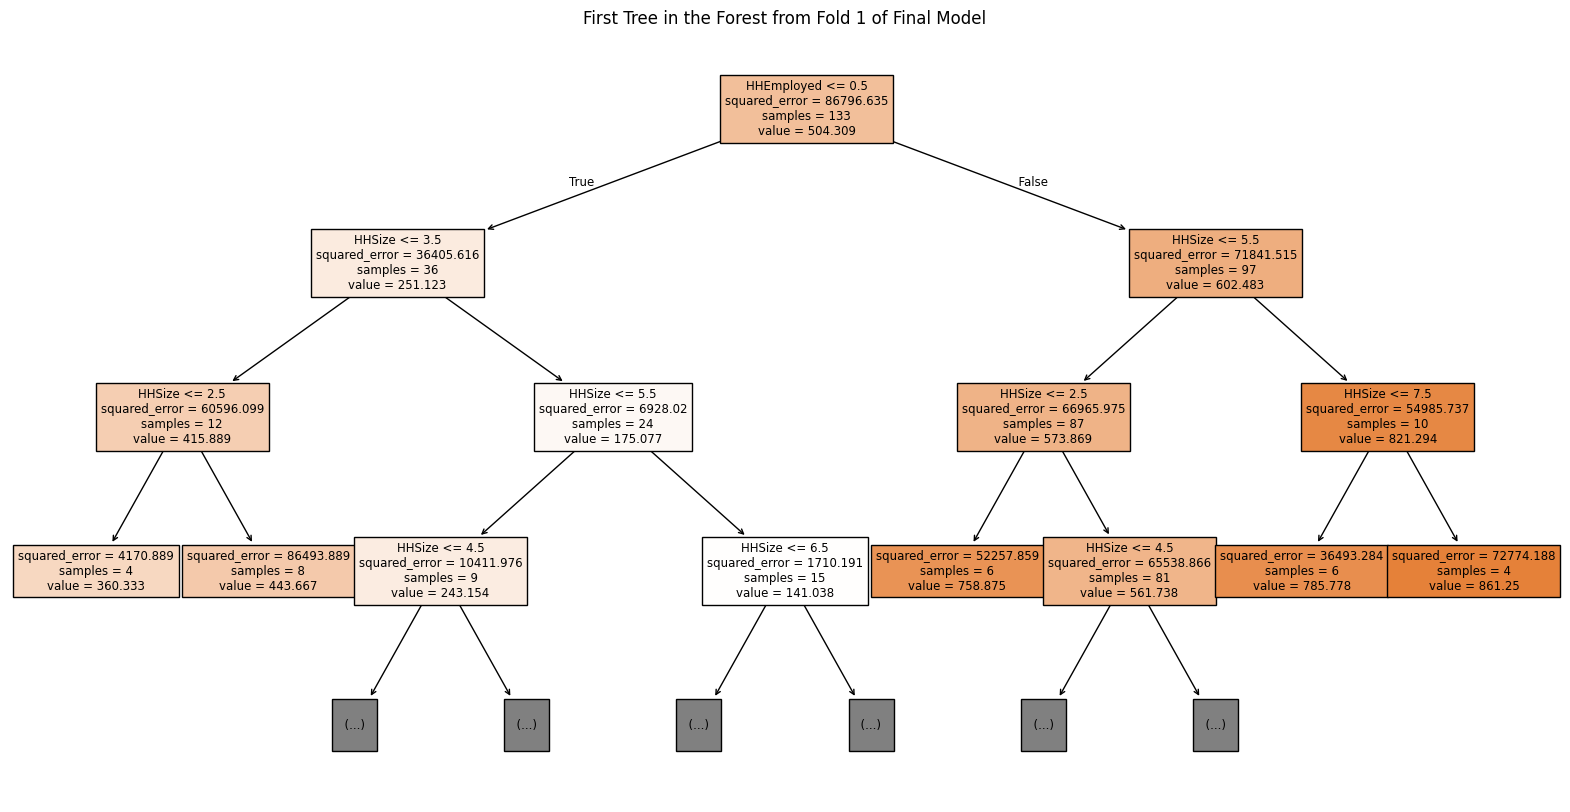

C:\Users\morel\AppData\Local\Temp\ipykernel_18400\4124949832.py:30: OptimizeWarning: Covariance of the parameters could not be estimated
  params, cavariance = curve_fit(logistic_func, y_test, y_pred)


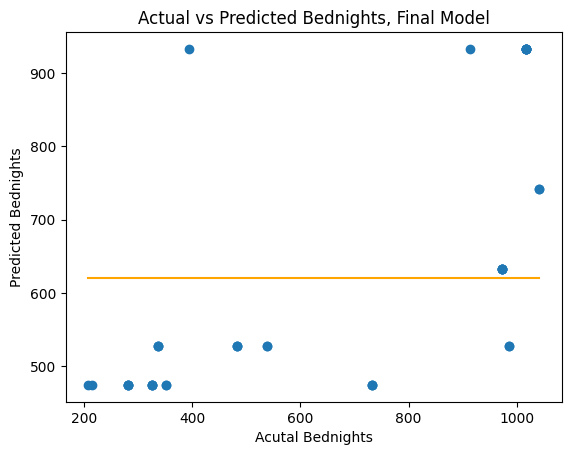

Fold 1 - MSE: 54580.3290, RMSE: 233.6243, R^2: 0.4512


<Figure size 640x480 with 0 Axes>

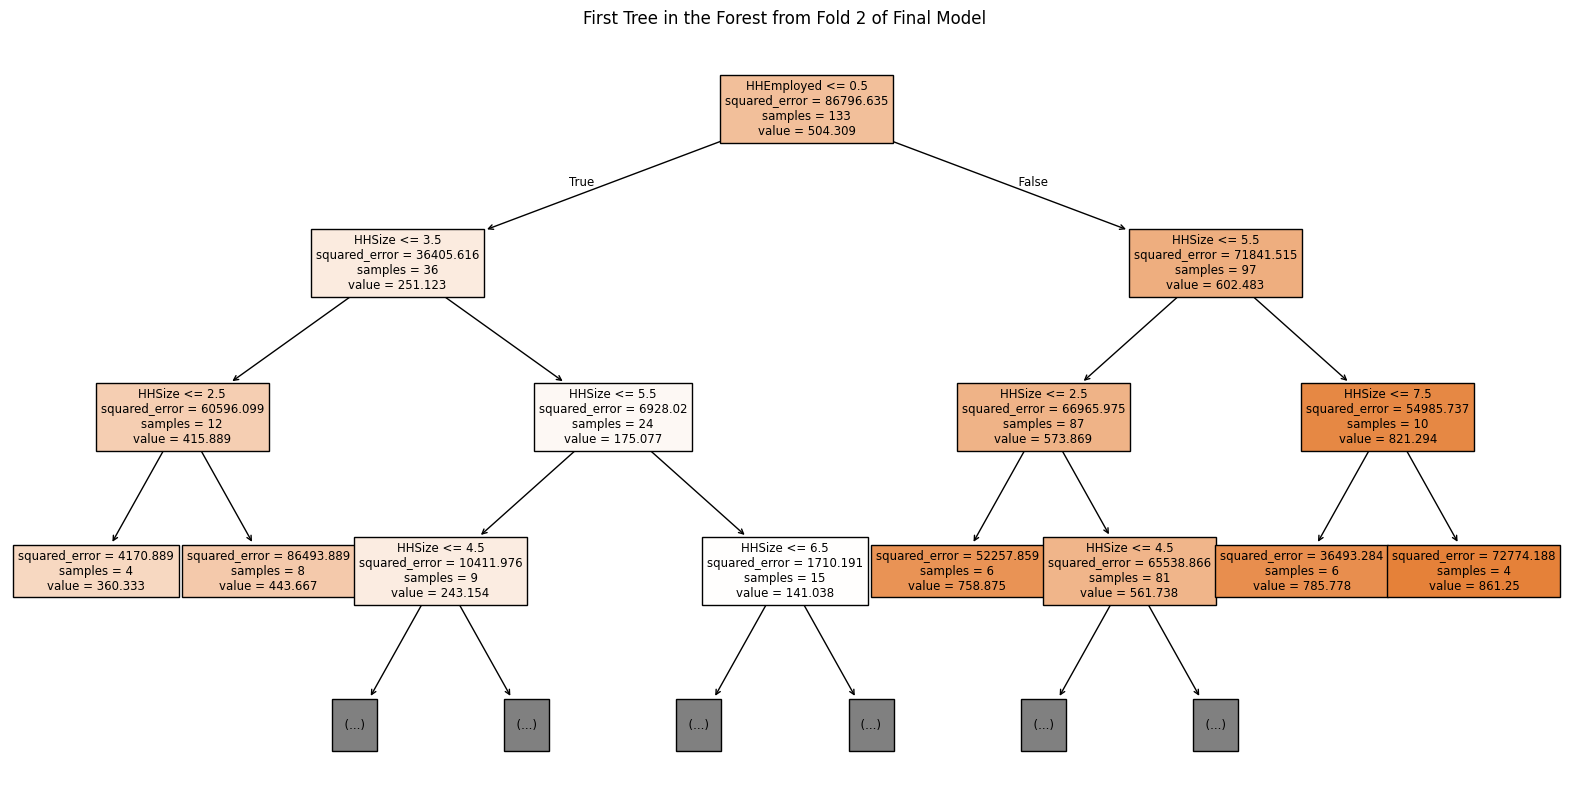

C:\Users\morel\AppData\Local\Temp\ipykernel_18400\4124949832.py:30: OptimizeWarning: Covariance of the parameters could not be estimated
  params, cavariance = curve_fit(logistic_func, y_test, y_pred)


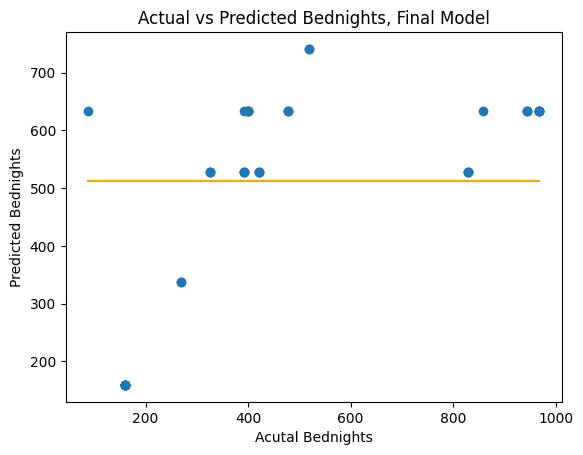

Fold 2 - MSE: 52229.3898, RMSE: 228.5375, R^2: 0.3755


<Figure size 640x480 with 0 Axes>

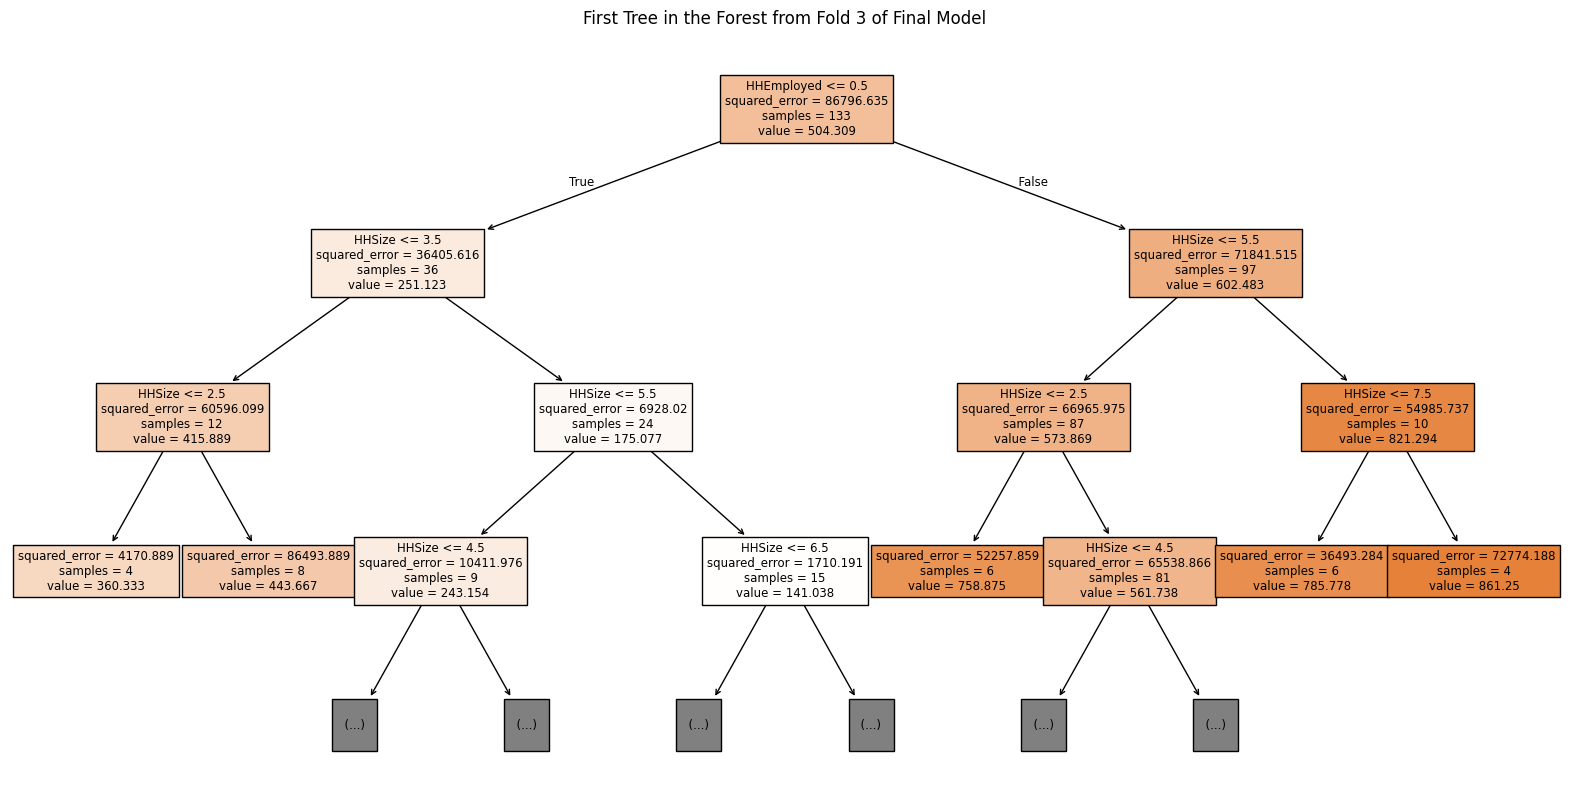

C:\Users\morel\AppData\Local\Temp\ipykernel_18400\4124949832.py:30: OptimizeWarning: Covariance of the parameters could not be estimated
  params, cavariance = curve_fit(logistic_func, y_test, y_pred)


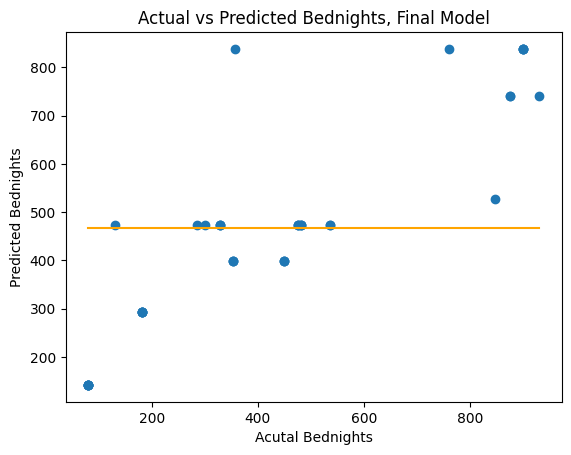

Fold 3 - MSE: 19072.0304, RMSE: 138.1015, R^2: 0.7462


<Figure size 640x480 with 0 Axes>

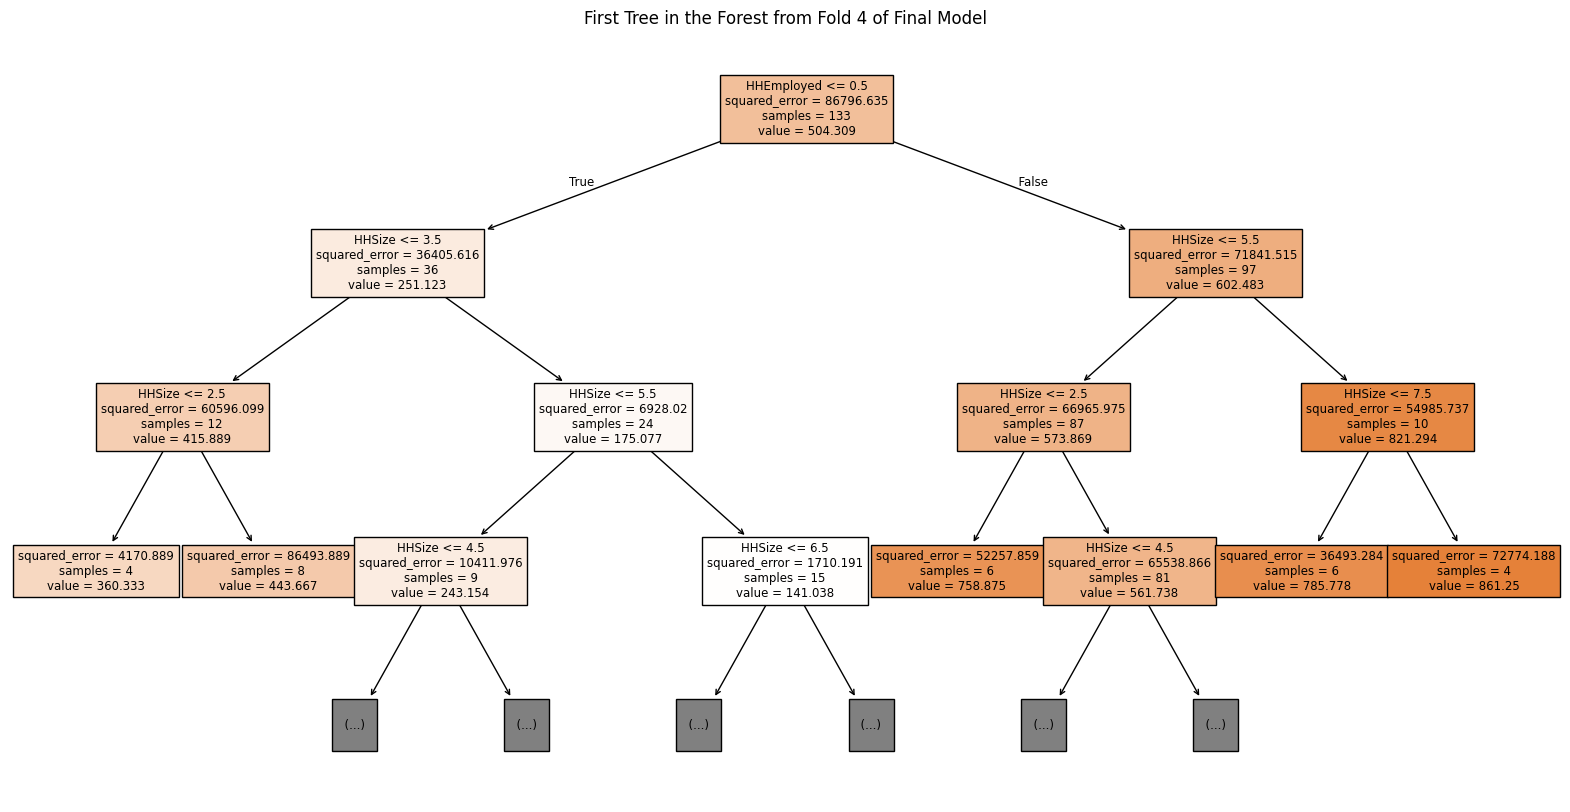

C:\Users\morel\AppData\Local\Temp\ipykernel_18400\4124949832.py:30: OptimizeWarning: Covariance of the parameters could not be estimated
  params, cavariance = curve_fit(logistic_func, y_test, y_pred)


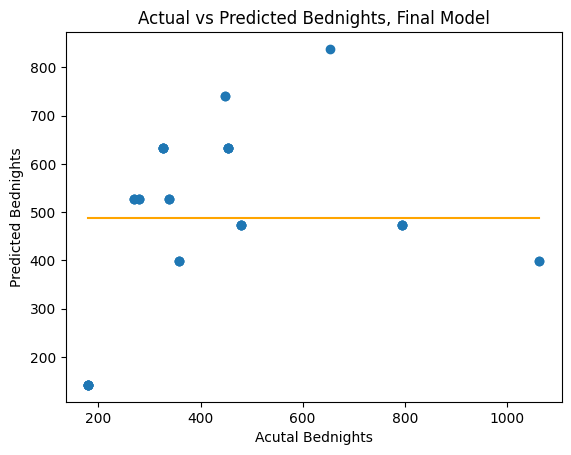

Fold 4 - MSE: 64193.7536, RMSE: 253.3649, R^2: -0.3098


<Figure size 640x480 with 0 Axes>

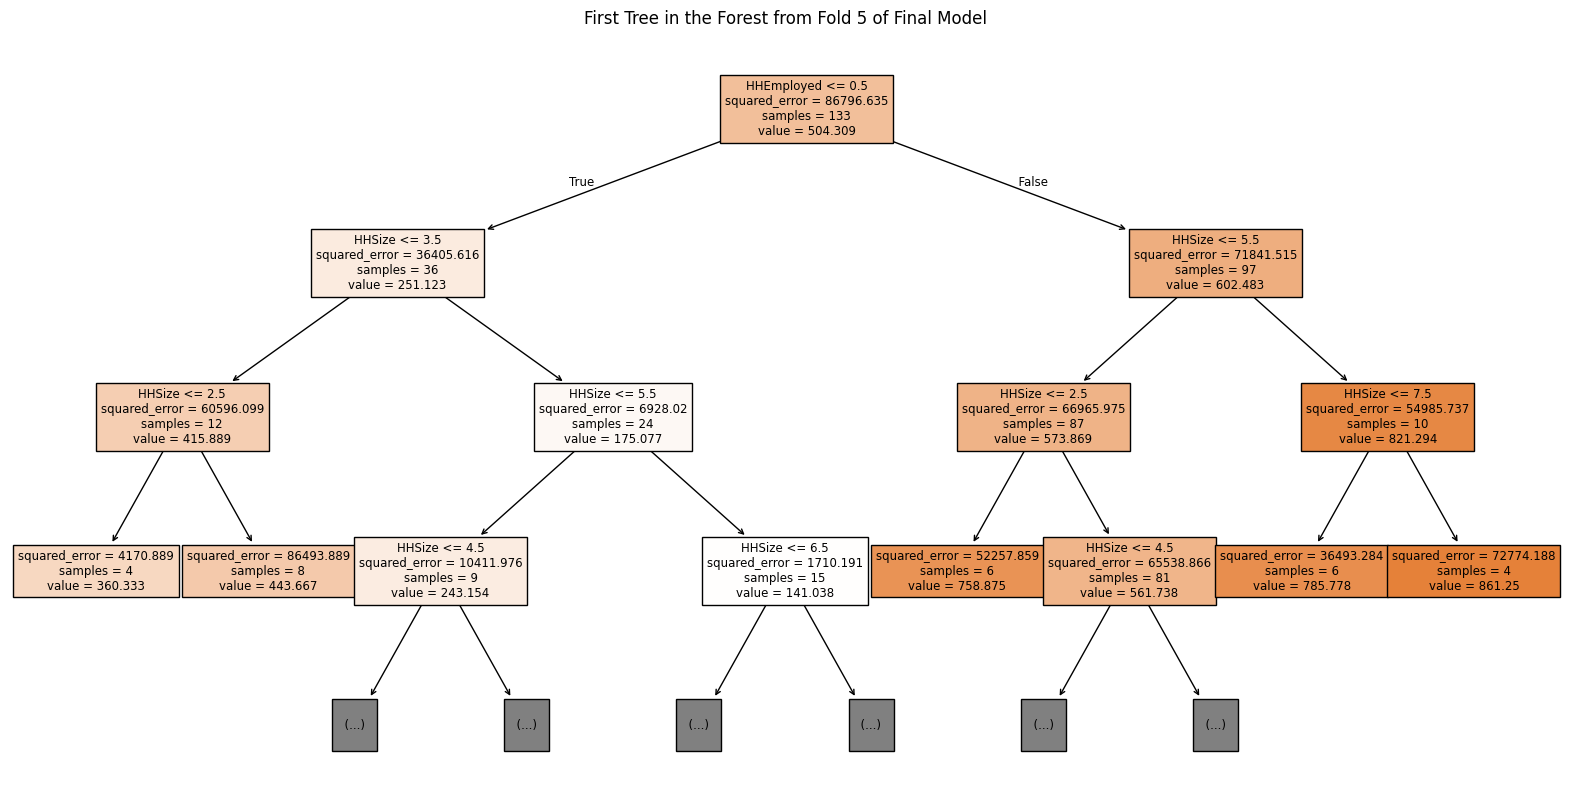

C:\Users\morel\AppData\Local\Temp\ipykernel_18400\4124949832.py:30: OptimizeWarning: Covariance of the parameters could not be estimated
  params, cavariance = curve_fit(logistic_func, y_test, y_pred)


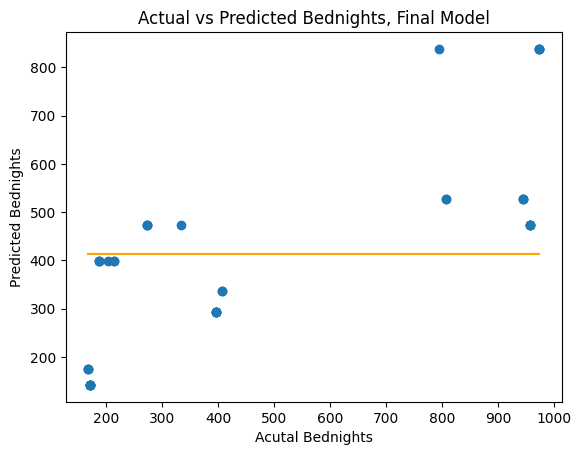

Fold 5 - MSE: 53403.4552, RMSE: 231.0919, R^2: 0.5115


<Figure size 640x480 with 0 Axes>

In [13]:
##Improve Final Model: predict bednights. train final model
x_best = x[best_features]

for fold, (train_idx, test_idx) in enumerate(gkf.split(x_best, y, groups)):
    x_train, x_test = x_best.iloc[train_idx], x_best.iloc[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx] 
    
    final_model = RandomForestRegressor(random_state = 42)
    final_model.fit(x_best, y)

    ##predict bednights
    y_pred = final_model.predict(x_test)
    first_tree = final_model.estimators_[0]
    feature_names = x_best.columns

    ##show tree
    plt.figure(figsize=(20, 10))
    plot_tree(first_tree,
             feature_names=feature_names,
             filled=True,
             rounded=False,
             max_depth=3)
    plt.title(f'First Tree in the Forest from Fold {fold+1} of Final Model')
    plt.show()
    plt.clf()

    ##compare acutal and predicted bednights: fitness. logistic best fit
    def logistic_func(x, a, b, c, d):
        return a / (1.0 + np.exp(-c * (x - d))) + b
    params, cavariance = curve_fit(logistic_func, y_test, y_pred)
    a, b, c, d = params
    x_fit = np.linspace(min(y_test), max(y_test), 100)
    y_fit = logistic_func(x_fit, a, b, c, d)
    
    plt.scatter(y_test, y_pred)
    a, b = np.polyfit(y_test, y_pred, 1)
    plt.plot(x_fit, y_fit, color='orange')
    plt.xlabel('Acutal Bednights')
    plt.ylabel('Predicted Bednights')
    plt.title('Actual vs Predicted Bednights, Final Model')
    plt.show()
    plt.clf()

    ##Evaluate
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    print(f'Fold {fold+1} - MSE: {mse:.4f}, RMSE: {rmse:.4f}, R^2: {r2:.4f}')

Outcome: the model has improved over the original Forest and over Linear Regression. Will attempt hypertuning original Forest in a new notebook for improvement.